# Sales data analysis

In [26]:
#Importing libraries
from numpy import *
from pandas import *
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
#Read the file 
data=read_csv(r"C:\Users\DELL\Documents\Python\Project two\Sales Data - Copy.csv",parse_dates=["Order Date"])

## Data preprocessing

In [3]:
data.head()  #Look at the data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
data.info()   #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB


In [5]:
data.isna().sum()  #Check for null values

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
data.columns   #Show columns in DatFrame

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [7]:
data[["Street","City","Code"]]=data["Purchase Address"].str.split(",",expand=True)   # Expand the address

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Street            185950 non-null  object        
 12  Code              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memor

In [9]:
data=data.drop(["Unnamed: 0"],axis=1)   #drop unnamed column

In [10]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301


In [11]:
data["Day"]=data["Order Date"].dt.strftime('%d')   #adding another column of order day

In [12]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301,18


In [13]:
data.duplicated().sum()  #check for duplicate values

264

In [14]:
data=data.drop_duplicates()   #drop duplicate values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  int64         
 10  Street            185686 non-null  object        
 11  Code              185686 non-null  object        
 12  Day               185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memor

In [22]:
data["Month"]=data["Month"].astype("object")
data["Hour"]=data["Hour"].astype("object")      #Modifing data types
data["Order ID"]=data["Order ID"].astype("object")


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  object        
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  object        
 10  Street            185686 non-null  object        
 11  Code              185686 non-null  object        
 12  Day               185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memor

## Explaratory Data analysis

In [24]:
data.describe()   #describing the data

,Quantity Ordered,Price Each,Sales
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,185.611936
std,0.443069,332.843838,333.032118
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301,18


In [28]:
data["City"].unique()   # unique values in city column

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [30]:
data["City"].nunique()      #Number of unique values in city column

9

In [42]:
A=data.groupby(data["City"]).sum()["Sales"].to_frame("Sales").sort_values("Sales",ascending=False)
A       #Grouping data by city

,Sales
City,
San Francisco,8254743.55
Los Angeles,5448304.28
New York City,4661867.14
Boston,3658627.65
Atlanta,2794199.07
Dallas,2765373.96
Seattle,2745046.02
Portland,2319331.94
Austin,1818044.33


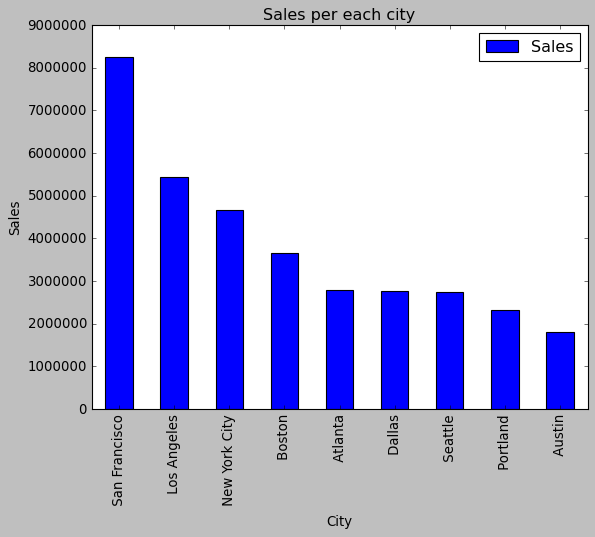

In [62]:
# The city with the highest sales
A.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales per each city")
plt.style.use("classic")


In [63]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301,18


In [65]:
data["Product"].nunique()

19

In [82]:
B=data.groupby("Product").count()["Sales"].to_frame("No of orders").sort_values("No of orders",ascending=False)
B    #grouping data by products

,No of orders
Product,
USB-C Charging Cable,21859
Lightning Charging Cable,21610
AAA Batteries (4-pack),20612
AA Batteries (4-pack),20558
Wired Headphones,18849
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
27in FHD Monitor,7498
iPhone,6840


Text(0.5, 1.0, 'Highest number of orders')

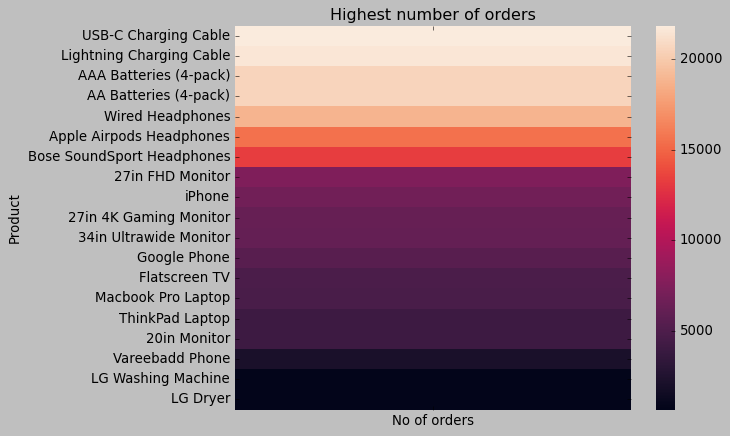

In [84]:
# Heat map show the most required products
sns.heatmap(B)
plt.title("Highest number of orders")

In [85]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301,18


In [88]:
C=data.groupby("Month").count()["Sales"].to_frame("No of orders").sort_values("Month")
C   

,No of orders
Month,
1,9699
2,11957
3,15128
4,18257
5,16552
6,13535
7,14275
8,11943
9,11603


Text(0.5, 1.0, 'Orders per each month')

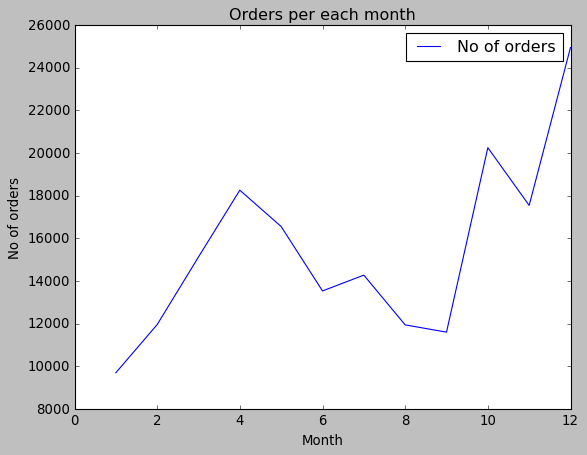

In [90]:
# Determine the sales per each month 
C.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("No of orders")
plt.title("Orders per each month")

In [91]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Street,Code,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,136 Church St,NY 10001,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,562 2nd St,NY 10001,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,277 Main St,NY 10001,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,410 6th St,CA 94016,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,43 Hill St,GA 30301,18


<AxesSubplot:xlabel='Day'>

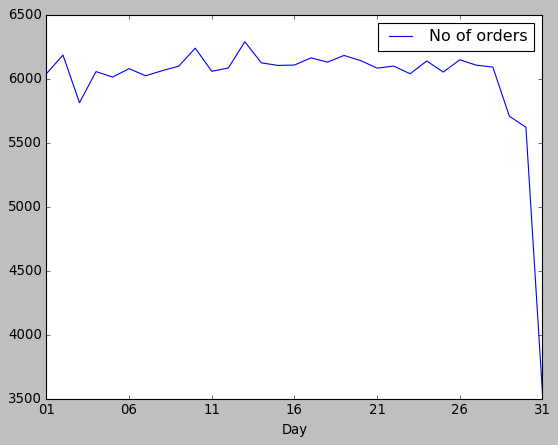

In [97]:
#Days with highest number of orders 
data.groupby("Day").count()["Sales"].to_frame("No of orders").sort_values("Day",ascending=True).plot(kind="line")

<AxesSubplot:xlabel='Hour'>

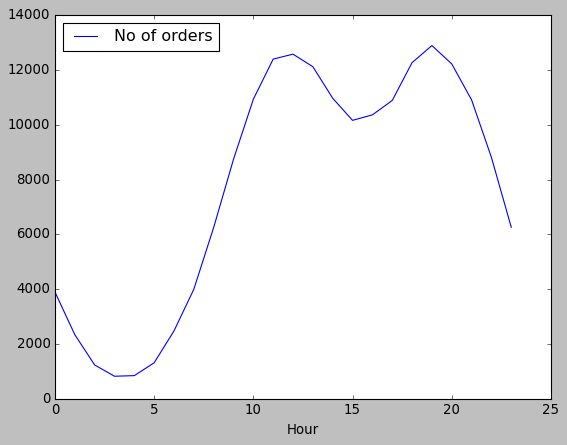

In [100]:
# hours which have highest number of orders
data.groupby("Hour").count()["Sales"].to_frame("No of orders").sort_values("Hour",ascending=True).plot(kind="line")

In [104]:
data.to_csv(r"C:\Users\DELL\Documents\Python\Project two\Clean sales Data .csv")   # Creating a new csv file with the cleaned data